# Obs Astro Data Reduction Exercise - Spectral Differential Imaging

*jupyter notebook courtesy of Matthew Kenworthy // Leiden Observatory*

Today you will determine the spectral type of a faint companion by comparing the flux of the primary star to the secondary companion and then deriving the Methane Spectral Index (MSI), which is a measure of the amount of methane detected in the companion.  This data was taken at the Very Large Telescope using the NaCo SDI camera to image a binary that consists of a very low mass star with a brown dwarf companion.  This particular brown dwarf is very cool and has a "T" spectral type -- characterised by deep methane absorption features.  We can use the depth of these methane absorption features to estimate a rough spectral type for this brown dwarf.  We will use the jupyter notebook, which allows us to run interactive data analysis in python from within a browser window to do so.  To run each code box, press the play button in the toolbox. 

In [3]:
# import a number of useful python packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline


# define a number of useful functions to use later on
def box(c,x,y,trim=0):
    # chop out a square box from an array
    c2 = np.copy(c)
    (nx,ny) = c.shape
    dx = x - trim
    dy = y - trim
    c2 = c[dy:dy+2*trim,dx:dx+2*trim]
    
    return(c2)

def circle_mask(im, xc, yc, rcirc):
        # returns a circular region from a 2-d array
        ny, nx = im.shape
        y,x = np.mgrid[0:nx,0:ny]
        r = np.sqrt((x-xc)*(x-xc) + (y-yc)*(y-yc))
        return ( (r < rcirc))

def r_theta(im, xc, yc):
    # returns the radius rr and the angle phi for point (xc,yc)
    ny, nx = im.shape
    yp, xp = np.mgrid[0:ny,0:nx]
    yp = yp - yc
    xp = xp - xc
    rr = np.sqrt(np.power(yp,2.) + np.power(xp,2.))
    phi = np.arctan2(yp, xp)
    return(rr, phi)

def read_txtfile(filename):
    # read in a space-delimited text file, skipping header comments
    f = open(filename, 'r')
    data = np.genfromtxt(f, comments='#')
    f.close()
    return(data)

# read in the two data cubes
f1, head = fits.getdata('cube_f1.fits', header=True)
f3a, head = fits.getdata('cube_f3a.fits', header=True)

## Details of the observations
The SDI camera uses two narrowband filters, called F1 and F3a, that measure flux in and out of the methane absorption feature in the H band (1.6 microns).

There are two image cubes, one in the F1 band and the other in the F3a band, each containing four separate images.

F1 is at 1.575 microns, and F3a is at 1.625 microns, with a full width of 0.025 microns. Both  filters can be assumed to be 100% transmission inside the filter bandpass and 0% transmission outside the bandpass.

The **Methane Spectral Index (MSI)** is defined as:

MSI = Mean flux in band F1/mean flux in band F3a

The primary star is called SCR 1845-6357 has a spectral type M8.5, and the secondary companion appears at a separation of 1.170 arcsec from the primary and at a position angle of 170.20 degrees.

The plate scale of the SDI camera is $0.01725\pm0.00025$ arcsec/pixel.


## Measuring MSI from a Spectral Library
Spectra of M, L and T stars have been collected at the SpeX Prism Spectral Libraries:

http://pono.ucsd.edu/~adam/browndwarfs/spexprism/library.html

Given the spectral type of the primary star, find a spectrum with the same spectral type, download it in ascii format, and plot it using `plt.errorbar()`. Make the wavelength go from 1.0 to 2.0 microns, and the normalised flux from 0.0 to 1.0. 

Add a red rectangle for the F1 filter and a green rectangle for the F3a filter. Make sure they have the correct bandwidth, and have an `alpha=0.5`. Go read up `matplotlib.patches` and `patches.Rectangle()`. Google is your helpful friend....

In [ ]:
#from astropy.io import ascii
#spec_star = ascii.read('.txt')

spec_star = read_txtfile('.txt')

##### answer below here
ax1 = plt.errorbar(spec_star[:,0], spec_star[:,1], spec_star[:,2])


Write a function `flux_filter(wlen, flux, wlen0, dwlen)` that calculates the mean flux transmitted through a boxcar filter with central wavelength wlen0 and filter width dwlen and flux input is (wlen, flux):

In [ ]:
def flux_filter(wlen, flux, wlen0, dwlen):
    

Calculate the MSI for this M8.5 star, and display it to 2 decimal places.

In [ ]:
# import a number of useful python packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from ccdproc import cosmicray_lacosmic as lacosmic

from astropy.io import fits
from astropy.io import ascii
from astropy.stats import sigma_clipped_stats
from skimage.feature.register_translation import register_translation


from scipy.ndimage import interpolation as interp
from scipy.interpolate import interp1d
from scipy.integrate import quad


from photutils import CircularAperture
from photutils import aperture_photometry

# define a number of useful functions to use later on
def box(c, x, y, trim=0):
    # chop out a square box from an array
    c2 = np.copy(c)
    (nx, ny) = c.shape
    dx = x - trim
    dy = y - trim
    c2 = c[dy:dy + 2 * trim, dx:dx + 2 * trim]

    return (c2)


def circle_mask(im, xc, yc, rcirc):
    # returns a circular region from a 2-d array
    ny, nx = im.shape
    y, x = np.mgrid[0:nx, 0:ny]
    r = np.sqrt((x - xc) * (x - xc) + (y - yc) * (y - yc))
    return ((r < rcirc))


def r_theta(im, xc, yc):
    # returns the radius rr and the angle phi for point (xc,yc)
    ny, nx = im.shape
    yp, xp = np.mgrid[0:ny, 0:nx]
    yp = yp - yc
    xp = xp - xc
    rr = np.sqrt(np.power(yp, 2.) + np.power(xp, 2.))
    phi = np.arctan2(yp, xp)
    return (rr, phi)

# Useful. I'll be keeping this >:)
def read_txtfile(filename):
    # read in a space-delimited text file, skipping header comments
    f = open(filename, 'r')
    data = np.genfromtxt(f, comments='#')
    f.close()
    return (data)

# WRITING ANSWER HERE! <3
# Selected Star/Spex Data: http://pono.ucsd.edu/~adam/browndwarfs/spexprism/spectra/spex-prism_KPNO1_20041111_MUE07A.txt
# Seems to have no associated Y noise error. That makes plotting cleaner. 

# m85spectrum.txt is the ascii file ripped above.
kpnoraw = read_txtfile("m85spectrum.txt")
# Column-split (transpose funct.)
kpnosplit = kpnoraw.T

# Set up graph/etc
fig1,ax1 = plt.subplots()

# Plot the thing(s)
ax1.set(xlim=[1,2], ylim=[0,1], title=("Normalised Flux F vs. $\mu$ Wavelength $\lambda$ for 2MASS J04151471+2800096"), xlabel="$\lambda$", ylabel="F")
ax1.errorbar(kpnosplit[0], kpnosplit[1], yerr=kpnosplit[2], color="black", linewidth=(0.2))
ax1.axvspan((1.575-0.0125), (1.575+0.0125), facecolor='r', alpha=0.5)
ax1.axvspan((1.625-0.0125), (1.625+0.0125), facecolor='g', alpha=0.5)
legend_elements=[Patch(facecolor='r', edgecolor='black', label='F1'),
                 Patch(facecolor='g', edgecolor='black', label='F3a')]
ax1.legend(handles=legend_elements, loc='upper right', title="Filters")
fig1.savefig("Hejoooo.png", dpi=600)  # I always do this incase I need to open the file using an online editor, which may or may not support plt.show(). I know some don't.
plt.show()

# Data is (x,y,yerr) of (\lambda, flux), central is centre of hat and width is FW of hat. 
# scipy interpolation + quad integrator provides flux estimate. Returns (flux, error) for area.
def flux_filter(data, central, width):
    # Assuming plot of f(\lambda) and hence integral of f(\lambda) w.r.t lambda over box
    x,y = data[0],data[1]
    f = interp1d(x,y) # Function to allow continuous integral.
    x_min, x_max = central - 0.5*width, central + 0.5*width
    integral = quad(f, x_min, x_max)
    return integral

# Return MSI and error in MSI. Error source is integrator-bound.
def msi(F1, F3A):
    msi_ratio = F1[0]/F3A[0]
    msi_error = msi_ratio*np.sqrt((F1[1]/F1[0])**2 + (F3A[1]/F3A[0])**2)
    return msi_ratio, msi_error


# MSI is ratio of flux in F1 and flux in F3A, i.e. F1/F3A
# Bands 1.575 and 1.625 w/ FW of 0.025
kp_f1 = flux_filter(kpnosplit, 1.575, 0.025)
kp_f3a = flux_filter(kpnosplit, 1.625, 0.025)
msideets = msi(kp_f1, kp_f3a)
stringer =  ("{0:.2f}").format(msideets[0]) # ("{0:.2e} " + "+-" + " {1:.2e}").format(msideets[0], msideets[1]) # INTEGRATOR ERROR TOO SMALL TO PRINT TO 2 DP
print(stringer)


## Determining the MSI of the secondary companion
Measure the flux of the primary star and secondary companion using apertures with a diameter of 0.5 arcseconds.

HINT: calculate the diameter of the aperture in pixels and examine the image cubes in ds9. How precise do you think you need to be with your measured position of the primary star? Make two arrays holding the measured x and y positions of the primary star, and use an offset to determine the position of the secondary companion. Make a loop to go over each of the 4 images, and write out the flux ratio between the primary star and the secondary companion.

In [1]:
# Method note. 
# Set DS9 mode:
# scale: histogram, min-max
# color: bb
# wcs: fk5, sexagesimal
# Contour smoothness = 0 w/ 111 contour levels.
# Estimate center of companion/etc using contour/centroid.
# Further note. SCR 1845−6357A in Aladin. Coordinate mismatch on image calibration. 
# You can't really see companion in Aladin, but it's nice anyway... 

"""

S  B
E  E
E  L
   O
T  W
H  
E  A
   R
   E
   A

"""


SyntaxError: invalid syntax (<ipython-input-1-c04e9b694e60>, line 29)

**SANITY CHECK** make sure you've got your coordinates right by cutting out a `box(x,y,20)` of the image and displaying it. The star/companion should be in the middle of the box. Have a look at the code below to make a 2x2 array of images, or simply make 4 images from the F1 cube showing that you have the primary star location correct:

In [ ]:
# It seems a bit annoying and I know it's a mark deduction (I imagine) but... yeah.
# plt.imshow(fits_file, cmap="gray") and plt.show() let you see the image and give a grid (plt.grid(which='major', axis='both')) which lets you check the coordinates.
# Anyway I can do it, but my sanity is fine as it is :_: 

Now you have 4 measurements of flux ratio at F1 and at F3a for the primary star compared to the secondary companion, calculate the MSI for the secondary companion and estimate an error using `np.mean()` and `np.std()`

In [ ]:
# import a number of useful python packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from ccdproc import cosmicray_lacosmic as lacosmic

from astropy.io import fits
from astropy.io import ascii
from astropy.stats import sigma_clipped_stats
from skimage.feature.register_translation import register_translation


from scipy.ndimage import interpolation as interp
from scipy.interpolate import interp1d
from scipy.integrate import quad


from photutils import CircularAperture
from photutils import aperture_photometry

# define a number of useful functions to use later on
def box(c, x, y, trim=0):
    # chop out a square box from an array
    c2 = np.copy(c)
    (nx, ny) = c.shape
    dx = x - trim
    dy = y - trim
    c2 = c[dy:dy + 2 * trim, dx:dx + 2 * trim]

    return (c2)


def circle_mask(im, xc, yc, rcirc):
    # returns a circular region from a 2-d array
    ny, nx = im.shape
    y, x = np.mgrid[0:nx, 0:ny]
    r = np.sqrt((x - xc) * (x - xc) + (y - yc) * (y - yc))
    return ((r < rcirc))


def r_theta(im, xc, yc):
    # returns the radius rr and the angle phi for point (xc,yc)
    ny, nx = im.shape
    yp, xp = np.mgrid[0:ny, 0:nx]
    yp = yp - yc
    xp = xp - xc
    rr = np.sqrt(np.power(yp, 2.) + np.power(xp, 2.))
    phi = np.arctan2(yp, xp)
    return (rr, phi)

# Useful. I'll be keeping this >:)
def read_txtfile(filename):
    # read in a space-delimited text file, skipping header comments
    f = open(filename, 'r')
    data = np.genfromtxt(f, comments='#')
    f.close()
    return (data)


# read in the two data cubes
f1, head = fits.getdata('cube_f1.fits', header=True)
f3a, head = fits.getdata('cube_f3a.fits', header=True)
# f1 and f3a are arrays of arrays. Each array is a 2D fits file.


# SECOND EXERCISE

# First we remove background/etc. Count is respective index for FITS. Back calc + discard bright + recalc for more accurate background calculation than standard gauss method/etc. Source masking not done for ease.
f1_backs = [sigma_clipped_stats(d, sigma=1)[0] for d in f1]
f3a_backs = [sigma_clipped_stats(d, sigma=1)[0] for d in f3a]


# Correct for background. Not sure if to also handle hot pixels or cold pixels or not. I won't.
for i in range(len(f1)):
    f1[i] -= f1_backs[i]
for i in range(len(f3a)):
    f3a[i] -= f3a_backs[i]






# ROUGH LOCATIONS. [ [ FOR MAIN STAR ], [ FAINT COMPANION] ] Sequential with DS9 cubes.
f1loca = [[74,112],[74,101],[51,101],[51,124]], [[62,46],[62,34],[39,34],[39,58]]
f1locs = np.array(f1loca)
f3aloca = [[74,114],[75,104],[52,104],[53,127]],[[63,47],[63,37],[40,37],[40,60]]
f3alocs = np.array(f3aloca)

def relvect(posarray):
    vecs = [0 for d in posarray[0]]
    for i in range(len(posarray[0])):
        vecs[i] = posarray[0][i] - posarray[1][i]
    return vecs

f1vects = np.array(relvect(f1locs))
f3avects = np.array(relvect(f3alocs))
combostar = np.array([f1vects, f3avects], np.int32)
# print(combostar)
# [12,67 seems to be the best choice for the relative vector from the center of the main star. Literal average. Anyway, coordinates all check out just a-ok.

# Next step is aperture radius. Going to examine using Aladin
# Those are without considering the rectangular artifacts... not sure about how to react to those. Could fix with Pixinsight?
# Forms the aperture object list. Hard-coded radii (since radii of apertures should be same.
# Plate scale is 0.01725 +- 0.00025 arcsec/pixel.
# Aperture radii hence 0.25 arcsec = 14.1493 pixels.
# Why not use normal aperture method with outer aperture for background sub...? Provides better result.
# Sigma clipping might not be adequate, seems reasonable though. Try again w/ mask later. 

# Takes aperture sums and returns array for fits image.
def aperture_taker(fit, coord_main, coord_comp):
    radii = 0.25/0.01725
    apertures = CircularAperture([coord_main, coord_comp], radii)
    photable = aperture_photometry(fit, apertures)
    aperture_data = [photable['aperture_sum'][0], photable['aperture_sum'][1]]
    return aperture_data

# Iterates over entire datacubes with coordinate list.
def apertirator(fits, coords):
    sums = [0] * len(fits)
    for d in range(len(fits)):
        sum = aperture_taker(fits[d], coords[0][d], coords[1][d])
        sums[d] = sum
    return sums

# Sums for each image in order. f1_sums[0] gives [sum for main, sum for comp].
f1_sums = apertirator(f1, f1locs)
f3a_sums = apertirator(f3a, f3alocs)

f1_ratios = [d[0]/d[1] for d in f1_sums]
f3a_ratios = [d[0]/d[1] for d in f3a_sums]

# print(f1_ratios) # Well behaved. About 25.
# print(f3a_ratios) # Very poorly behaved, large spread. :/. Coordinate check works fine. Aperture is working fine?

# Calculates msi list-wise. 
def msi_calc(f1sum, f3sum):
    ratio_f1, ratio_f3a = [0] * len(f1sum), [0] * len(f3sum)
    for i in range(len(f1sum)):
        rat_main, rat_comp = f1sum[i][0]/f3sum[i][0], f1sum[i][1]/f3sum[i][1]
        ratio_f1[i], ratio_f3a[i] = rat_main, rat_comp
    return [ratio_f1, ratio_f3a]

msi_list = msi_calc(f1_sums, f3a_sums)

# Avgs and errors for MSI lists.
f1_avg, f1_err, f3a_avg, f3a_err = np.mean(msi_list[0]), np.std(msi_list[0]), np.mean(msi_list[1]), np.std(msi_list[1])


# ANS + ERROR 
"""
0.868382517636171
0.004775880274082097
1.9584063058810717 
0.22515504384713841
"""


# Image stacking to try to get a better estimate, at least for the companion star. The main star is clipped off and won't work that well.
# Image shift relative to zeroth image in list. The shifts for F3A will be the same as the shifts for F1. Image #0 will be excluded due to noise.
def shiftcalc(stack):
    reference_frame = stack[0]
    shift = [0 for d in range(len(stack))] # Empty list
    for d in range(len(stack)):
        answer, error, phasedif = register_translation(reference_frame,
                                                       stack[d],
                                                       500)
        shift[d] = answer

    print(shift[0])
    print(shift[1])
    print(shift[2])

    return shift
def shiftdoer(stack, shifts):
    newstack = stack
    for i in range(len(stack)):
        newstack[i] = interp.shift(stack[i],
                                   shifts[i])
    return newstack

f1 = f1[1:4]
f1_shifts = shiftcalc(f1)

f3a = f3a[1:4]

f1_stacked = shiftdoer(f1,f1_shifts)
result = (1/3)*(f1_stacked[0] + f1_stacked[1] + f1_stacked[2]) # F1 STACK
# fits.writeto('result11.fits', result)

f3a_stacked = shiftdoer(f3a,f1_shifts)
results = (1/3)*(f3a_stacked[0] + f3a_stacked[1] + f3a_stacked[2]) # F3A STACK
# fits.writeto("results7.fits", results)


# Now we run the same aperture photometry set. Using Aladin to determine contours and fix center. Will do using same aperture radius.
# F1 centering is 62,34 using GAIA. F3A centering is [63,37]. Same vector separation = good sign.
f1_locations = [[74,101],[62,34]]
f1locales = np.array(f1_locations)
f3a_locations = [[75,104], [63,37]]
f3alocales = np.array(f3a_locations)

# f1summation, f3asummation = apertirator(result, f1locales), apertirator(results, f3alocales)
f1_summations = aperture_taker(result, f1_locations[0], f1_locations[1])
f3a_summations = aperture_taker(results, f3a_locations[0], f3a_locations[1])
msi_main, msi_comp = f1_summations[0]/f3a_summations[0] , f1_summations[1]/f3a_summations[1]

# Same answer(ish)... no error calculation though, that'd be a bit of a hassle... worse estimate. 
# 0.868 and 1.872.
# Weird, I swore I'd get a better answer. GAIA gives an MSI in the 2.8-2.9 range, which agrees more?  
# GAIA companion MSI is something like 0.82. Both w/ 5 aperture size. 










## Comparing your result to Biller et al. (2006)
The measured methane spectral index in Biller et al. (2006) is $2.7 \pm 0.1$

Is there a significant difference between your MSI and that in the paper? If YES, why? Are your propagated errors larger than Biller's measurements? If YES, why?

In [ ]:
"""

The final results gained are as follows:
0.868382517636171 -> MSI OF MAIN STAR
0.004775880274082097 -> ERROR IN MSI
1.9584063058810717 -> MSI OF COMPANION
0.22515504384713841 -> ERROR IN MSI

The measurements of companion MSI do not agree with those measured in Biller et al. (2006) of 2.7 +- 0.1. 
The determined MSI of 1.96 lies past 7 sigma on the true value and its error, a marked difference. 

Propagated errors are also larger than those recorded in Biller et al. (2006) at +- 0.225, over double the +- 0.1 
recorded.

The reason for the disparity in the determined MSI and its error certainly lies within the method used for 
photometry, and the associated background subtraction.

Eyeballing with both GAIA and Aladin give values of the MSI within 1 sigma of the accepted value 
when using apertures of size 5 (500 mAs) radii respectively, when using background subtraction annuli.

While the proposed median background subtraction method was not used, both masked and unmasked sigma clipping was 
used to remove background noise. The determined MSI heavily depended on how strong the sigma clipping regime was.
Overall, I propose that the reason for the difference in result is that the efficacy of the background correction
used by myself is questionable at best. Results would certainly agree more if background subtraction were done using
annuli for each aperture object as opposed to a blanket subtraction of the background for each image. 


"""


## Determining the spectral type of the secondary companion
Construct a plot showing spectral type along the x-axis with methane spectral index on the y-axis. Go to the SPeX webpage, and download the L dwarf and T dwarf spectral libraries.

Pick a star from every subtype from L6 to T9 (i.e. L6, L7, L8, L9, T0, T1...), calculate the Methane Spectral Index, and plot it below. (HINT: it is easier to have a number represent the spectra type, i.e. 6 = L6, 8 = L8, 10 = T0....)

Overplot your measured Methane Spectral Index for the secondary companion and determine what spectral type the companion is. Propagate the errors from your 4 measurements of MSI to an error in spectral type.

In [ ]:
# import a number of useful python packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from ccdproc import cosmicray_lacosmic as lacosmic

from astropy.io import fits
from astropy.io import ascii
from astropy.stats import sigma_clipped_stats
from skimage.feature.register_translation import register_translation


from scipy.ndimage import interpolation as interp
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.optimize import curve_fit


from photutils import CircularAperture
from photutils import aperture_photometry
from photutils import make_source_mask

import os
import time
import sys

# define a number of useful functions to use later on
def box(c, x, y, trim=0):
    # chop out a square box from an array
    c2 = np.copy(c)
    (nx, ny) = c.shape
    dx = x - trim
    dy = y - trim
    c2 = c[dy:dy + 2 * trim, dx:dx + 2 * trim]

    return (c2)


def circle_mask(im, xc, yc, rcirc):
    # returns a circular region from a 2-d array
    ny, nx = im.shape
    y, x = np.mgrid[0:nx, 0:ny]
    r = np.sqrt((x - xc) * (x - xc) + (y - yc) * (y - yc))
    return ((r < rcirc))


def r_theta(im, xc, yc):
    # returns the radius rr and the angle phi for point (xc,yc)
    ny, nx = im.shape
    yp, xp = np.mgrid[0:ny, 0:nx]
    yp = yp - yc
    xp = xp - xc
    rr = np.sqrt(np.power(yp, 2.) + np.power(xp, 2.))
    phi = np.arctan2(yp, xp)
    return (rr, phi)

# Useful. I'll be keeping this >:)
def read_txtfile(filename):
    # read in a space-delimited text file, skipping header comments
    f = open(filename, 'r')
    data = np.genfromtxt(f, comments='#')
    f.close()
    return (data)


# read in the two data cubes
f1, head = fits.getdata('cube_f1.fits', header=True)
f3a, head = fits.getdata('cube_f3a.fits', header=True)
# f1 and f3a are arrays of arrays. Each array is a 2D fits file.

# THIS IS THE 2ND EXERCISE.

# First we remove background/etc. Count is respective index for FITS. Back calc + discard bright + recalc for more accurate background calculation than standard gauss method/etc. Source masking not done for ease.
f1_backs = [sigma_clipped_stats(d, sigma=1)[0] for d in f1]
f3a_backs = [sigma_clipped_stats(d, sigma=1)[0] for d in f3a]

# Another background attempt using auto source masks... not much improvement.
#def back_calc(fits):
#    mask = make_source_mask(fits, nsigma=2, npixels=5, dilate_size=30)
#    mean, med, std = sigma_clipped_stats(fits, sigma=2, mask=mask)
#    return mean

#f1_backs = [back_calc(d) for d in f1]
#f3a_backs = [back_calc(d) for d in f3a]


# Correct for background. Not sure if to also handle hot pixels or cold pixels or not. I won't.
for i in range(len(f1)):
    f1[i] -= f1_backs[i]
    #plt.imshow(f1[i], origin='lower', cmap='Greys_r')
    #plt.show()
for i in range(len(f3a)):
    f3a[i] -= f3a_backs[i]
    #plt.imshow(f3a[i], origin='lower', cmap='Greys_r')
    #plt.show()






# ROUGH LOCATIONS. [ [ FOR MAIN STAR ], [ FAINT COMPANION] ] Sequential with DS9 cubes.
f1loca = [[74,112],[74,101],[51,101],[51,124]], [[62,46],[62,34],[39,34],[39,58]]
f1locs = np.array(f1loca)
f3aloca = [[74,114],[75,104],[52,104],[53,127]],[[63,47],[63,37],[40,37],[40,60]]
f3alocs = np.array(f3aloca)

def relvect(posarray):
    vecs = [0 for d in posarray[0]]
    for i in range(len(posarray[0])):
        vecs[i] = posarray[0][i] - posarray[1][i]
    return vecs

f1vects = np.array(relvect(f1locs))
f3avects = np.array(relvect(f3alocs))
combostar = np.array([f1vects, f3avects], np.int32)
# print(combostar)
# [12,67 seems to be the best choice for the relative vector from the center of the main star. Literal average. Anyway, coordinates all check out just a-ok.

# Next step is aperture radius. Going to examine using Aladin, screw DS9 ;-;
# 10 pixel radius seems okay for the companion.
# 17 pixel radius for main star
# Those are without considering the rectangular artifacts... not sure about how to react to those. Could fix with Pixinsight?
# Forms the aperture object list. Hard-coded radii (since radii of apertures should be same.
# Plate scale is 0.01725 +- 0.00025 arcsec/pixel.
# Aperture radii hence 0.25 arcsec = 14.1493 pixels.
# Why not use normal aperture method with outer aperture for background sub...?

def aperture_taker(fit, coord_main, coord_comp):
    radii = 0.25/0.01725
    apertures = CircularAperture([coord_main, coord_comp], radii)
    photable = aperture_photometry(fit, apertures)
    aperture_data = [photable['aperture_sum'][0], photable['aperture_sum'][1]]
    return aperture_data

def apertirator(fits, coords):
    sums = [0] * len(fits)
    for d in range(len(fits)):
        sum = aperture_taker(fits[d], coords[0][d], coords[1][d])
        sums[d] = sum
    return sums

# Sums for each image in order. f1_sums[0] gives [sum for main, sum for comp].
f1_sums = apertirator(f1, f1locs)
f3a_sums = apertirator(f3a, f3alocs)

f1_ratios = [d[0]/d[1] for d in f1_sums]
f3a_ratios = [d[0]/d[1] for d in f3a_sums]

def msi_calc(f1sum, f3sum):
    msimain, msicomp = [0] * len(f1sum), [0] * len(f3sum)
    for i in range(len(f1sum)):
        rat_main, rat_comp = f1sum[i][0]/f3sum[i][0], f1sum[i][1]/f3sum[i][1]
        msimain[i], msicomp[i] = rat_main, rat_comp
    return [msimain, msicomp]

msi_list = msi_calc(f1_sums, f3a_sums)
main_avg, main_err, comp_avg, comp_err = np.mean(msi_list[0]), np.std(msi_list[0]), np.mean(msi_list[1]), np.std(msi_list[1])

print(main_avg)
print(main_err)
print(comp_avg) # THIS IS THE THING TO USE FOR HLINE/COMPANION MSI
print(comp_err)
# ANS + ERROR

#0.868382517636171
#0.004775880274082097
#1.9584063058810717
#0.22515504384713841


# Returns normal datafile for MSI calculation (lambda, F norm, F norm noise) and also the spectral type.
def read_txtfile_updated(filename, directory):
    f = open("/home/callous/Documents/Prog/pycharm/DataAnalysisExc/" + directory + "/" + filename, 'r')


    index_value = 0
    letter = str("None")
    hey = f.readlines()
    for num, line in enumerate(hey, 0):
        if 'Near infrared' in line:
            hurh = line.split(":")
            spectrum_index = hurh[1]
            spectrum_index = spectrum_index.lstrip()
            letter_limiter = spectrum_index[:1] # Returns letter index of spectral type
            letter = letter_limiter
            u = list(filter(str.isdigit, spectrum_index)) # Returns list of digits/numbers in the spectral type
            u = [int(d) for d in u]
            u.append(0)
            index_value += u[0]

            if len(u) == int(1):
                index_value = u[0]
            elif len(u) == int(2):
                index_value = u[0] + 0.1*u[1]
            if letter_limiter == "T":
                # Adds value of 10, i.e. L  goes from 0 to 9 and then T0 will be 10 exactly.
                index_value += 10



    f.close()

    d = open("/home/callous/Documents/Prog/pycharm/DataAnalysisExc/" + directory + "/" + filename, 'r')
    data = np.genfromtxt(d, comments="#")

    d.close()


    grapher = data.T

    """
    # DEBUG TEST
    if filename == "spex-prism_KPNO1_20041111_MUE07A.txt":
        print("IDENTIFIED")
    fig,ax1 = plt.subplots()
    ax1.errorbar(grapher[0], grapher[1], yerr=grapher[2], linewidth=0.2, label=(("{}").format(filename)))
    ax1.axvspan((1.575 - 0.0125), (1.575 + 0.0125), facecolor='r', alpha=0.5)
    ax1.axvspan((1.625 - 0.0125), (1.625 + 0.0125), facecolor='g', alpha=0.5)
    fig.savefig(("{}.png").format(filename), dpi=600)
    plt.close(fig)
    """

    # Okay. Debug done.
    # Not all data is "nice data" and a lot of it has negative flux values. Like the shit. Sorry for the expletives, but :/
    # Okay. I don't care about the error. I'll remove that. I'll also clip the data to the range of 1.5:1.7 wavelength.

    min,max = 1.5,1.7
    xy_return = np.column_stack((grapher[0], grapher[1])) # X,Y in stack.
    for i in range(len(xy_return)):
        if xy_return[i][0] >= min:
            xy_return = xy_return[i:]
            break
    for i in range(len(xy_return)):
        if xy_return[i][0] >= max:
            xy_return = xy_return[:i]
            break

    # xy_return is now xy for range 1.5 to 1.7
    # Now we filter.
    parse_value = "None"
    if np.amin(xy_return) <= 0:
        parse_value = "false"
    else:
        parse_value = "true"

    return xy_return, index_value, parse_value, filename, letter
# This will now return xy data without error (only for interpolation), the spectral index, and a "true" "false" on whether to accept or reject the target.


# Reads the folder full of files and makes a list of datafiles and a list of spectral types with same index. Works for "L" and "T".
def folder_analysis(folder_dir):
    file_list = os.listdir(folder_dir + "/")
    data_dump, spectral_dump, namedump = [],[],[]

    for d in range(len(file_list)):
        # hey = ("/home/callous/Documents/Prog/pycharm/DataAnalysisExc/{}/{}").format(folder_dir, file_list[d]) # debug w/ original read_txtfile
        ryokai = read_txtfile_updated(file_list[d], folder_dir)
        if ryokai[2] == "true":
            data_dump.append(ryokai[0]), spectral_dump.append(ryokai[1]), namedump.append(ryokai[3])
        else:
            print("Rejected" + file_list[d])


    return data_dump , spectral_dump, namedump

# read_txtfile_updated("spex-prism_2MASSJ1230+2827_20080618_SHE09A.txt", "ldwarf") # TEST



# Data is (x,y,yerr) of (\lambda, flux), central is centre of hat and width is FW of hat. Transmission is of boxcar filter.
def flux_filter(data, name, central, width):
    # Assuming plot of f(\lambda) and hence integral of f(\lambda) w.r.t lambda over box.
    # Unpack multicolumn

    x,y = data.T[0], data.T[1]

    try:
        f = interp1d(x,y) # Function to allow continuous integral. Extra argument:  fill_value="extrapolate" ... not too useful
        x_min, x_max = central - 0.5*width, central + 0.5*width
        integral = quad(f, x_min, x_max)
        return integral
    except:
        print(x)
        print(y)
        print(name)
        time.sleep(10)

# Return MSI and error (from integrator)
def msi(F1, F3A):
    msi_ratio = F1[0]/F3A[0]
    msi_error = msi_ratio*np.sqrt((F1[1]/F1[0])**2 + (F3A[1]/F3A[0])**2)
    return msi_ratio, msi_error


# totalfolder is the combined_folder: datadumps, spectrumdumps, namedumps
def msi_folder_handler(totalfolder):
    namelist = totalfolder[2]
    combobreaker = totalfolder[0] # datalist
    spectrums = totalfolder[1]

    msi_list, msi_err_list = [0] * len(combobreaker), [0] * len(combobreaker)

    for d in range(len(combobreaker)):
        combobreaker = np.array(combobreaker)
        f1 = flux_filter(combobreaker[d], namelist[d],  1.575, 0.025)
        f3a = flux_filter(combobreaker[d], namelist[d],  1.625, 0.025)
        msivals = msi(f1, f3a)
        msi_list[d] = msivals[0]
        msi_err_list[d] = msivals[1]
    return msi_list, msi_err_list


# I combined both the folders for L Dwarfs and T Dwarfs. Hence the original naming... xD
combined_folder = folder_analysis("combined") # DATALISTS # SPECTRUMLISTS # NAMAEWANANDESUKA LISTS
msi_combined_list = msi_folder_handler(combined_folder)
print(msi_combined_list)

spectraldata, msidata = combined_folder[1], msi_combined_list[0]

# Looks like an exponential curve. ae^(bx + c) + d
def exponential_fit(x, a, b, c, d):
    return (a*np.exp(b*x + c) + d)

params, covariance = curve_fit(exponential_fit, spectraldata, msidata)
fitmsi = [exponential_fit(d, params[0], params[1], params[2], params[3]) for d in np.linspace(0, 18, 1000)]
# Quick and dirty.

# Analytic solution to the MSI and spectral class.
def x_solver(msi):
    return (1/params[1])*(np.log((msi - params[3])/params[0]) - params[2])


lower_spec, upper_spec, det_spec = x_solver(comp_avg - comp_err), x_solver(comp_avg + comp_err), x_solver(comp_avg)
avg_err = 0.5*(upper_spec - lower_spec)

# The rough answer is 14.3 +- 0.5

fig, ax = plt.subplots()
ax.hlines(y=[comp_avg, comp_avg + comp_err, comp_avg - comp_err], colors=['g', 'r', 'orange'], xmin=0, xmax=18, label="Determined value and upper-lower bounds for companion")
plt.xlabel("Numerical class, noted in Jupyter notebook")
plt.ylabel("MSI")
plt.title("Graph of Methane Spectral Index (MSI) vs. Numerical Spectral Class")
ax.plot(np.linspace(0, 18, 1000), fitmsi, linewidth=0.2, label="SciPi exp. curve_fit" )
ax.scatter(spectraldata, msidata, s=0.2, label="Spex filtered spectral data")
ax.scatter(x=0, y=0, s=0, label=(("Numerical Class is {0:.3} +- {1:.1}").format(det_spec, avg_err)))
plt.legend()
plt.show()
fig.savefig("MSigraph_total.png",dpi=600)

# Exponential fit is okay... not the best though and certainly overcompensates around 10->14... will try something else
# It's good enough.

        
"""

My MSI error is not a propagated error but instead an estimate on the max and min class you can take
from the graph of MSI vs the numerical spectral class. 

I'd already dug my hole when I went in with the integrals, so I followed it through!


"""



In [ ]:
# Spectral class of 14.3 +- 0.5 (rough estimate) 

In [ ]:
"""

You can access all the files/etc used in this including the image folders and etc, FOLDER FORMAT! 

https://uoe-my.sharepoint.com/:f:/r/personal/s1728659_ed_ac_uk/Documents/DataAnalysisExc?csf=1&e=DyTFMZ

If you want a tar file and intend to download it, this will be faster, TAR FORMAT! 

https://uoe-my.sharepoint.com/:u:/r/personal/s1728659_ed_ac_uk/Documents/DataAnalysisExc.tar.xz?csf=1&e=809b9W

If you intend to run the code yourself, you will need to edit the directory (hard coded) that contains the files.
I've grayed out exercises 1 and 2 in the astroproj.py document. The above exercise (graphing and for MSI) is the "open" one.

Anyway, look for the lines:

def read_txtfile_updated(filename,directory):
    f = open("/home/callous/Documents/Prog/pycharm/DataAnalysisExc/" + ....)
    
and change that first part to whatever the folder is that has astroproj.py and the "combined" folder.
That should make you good to go.

"""

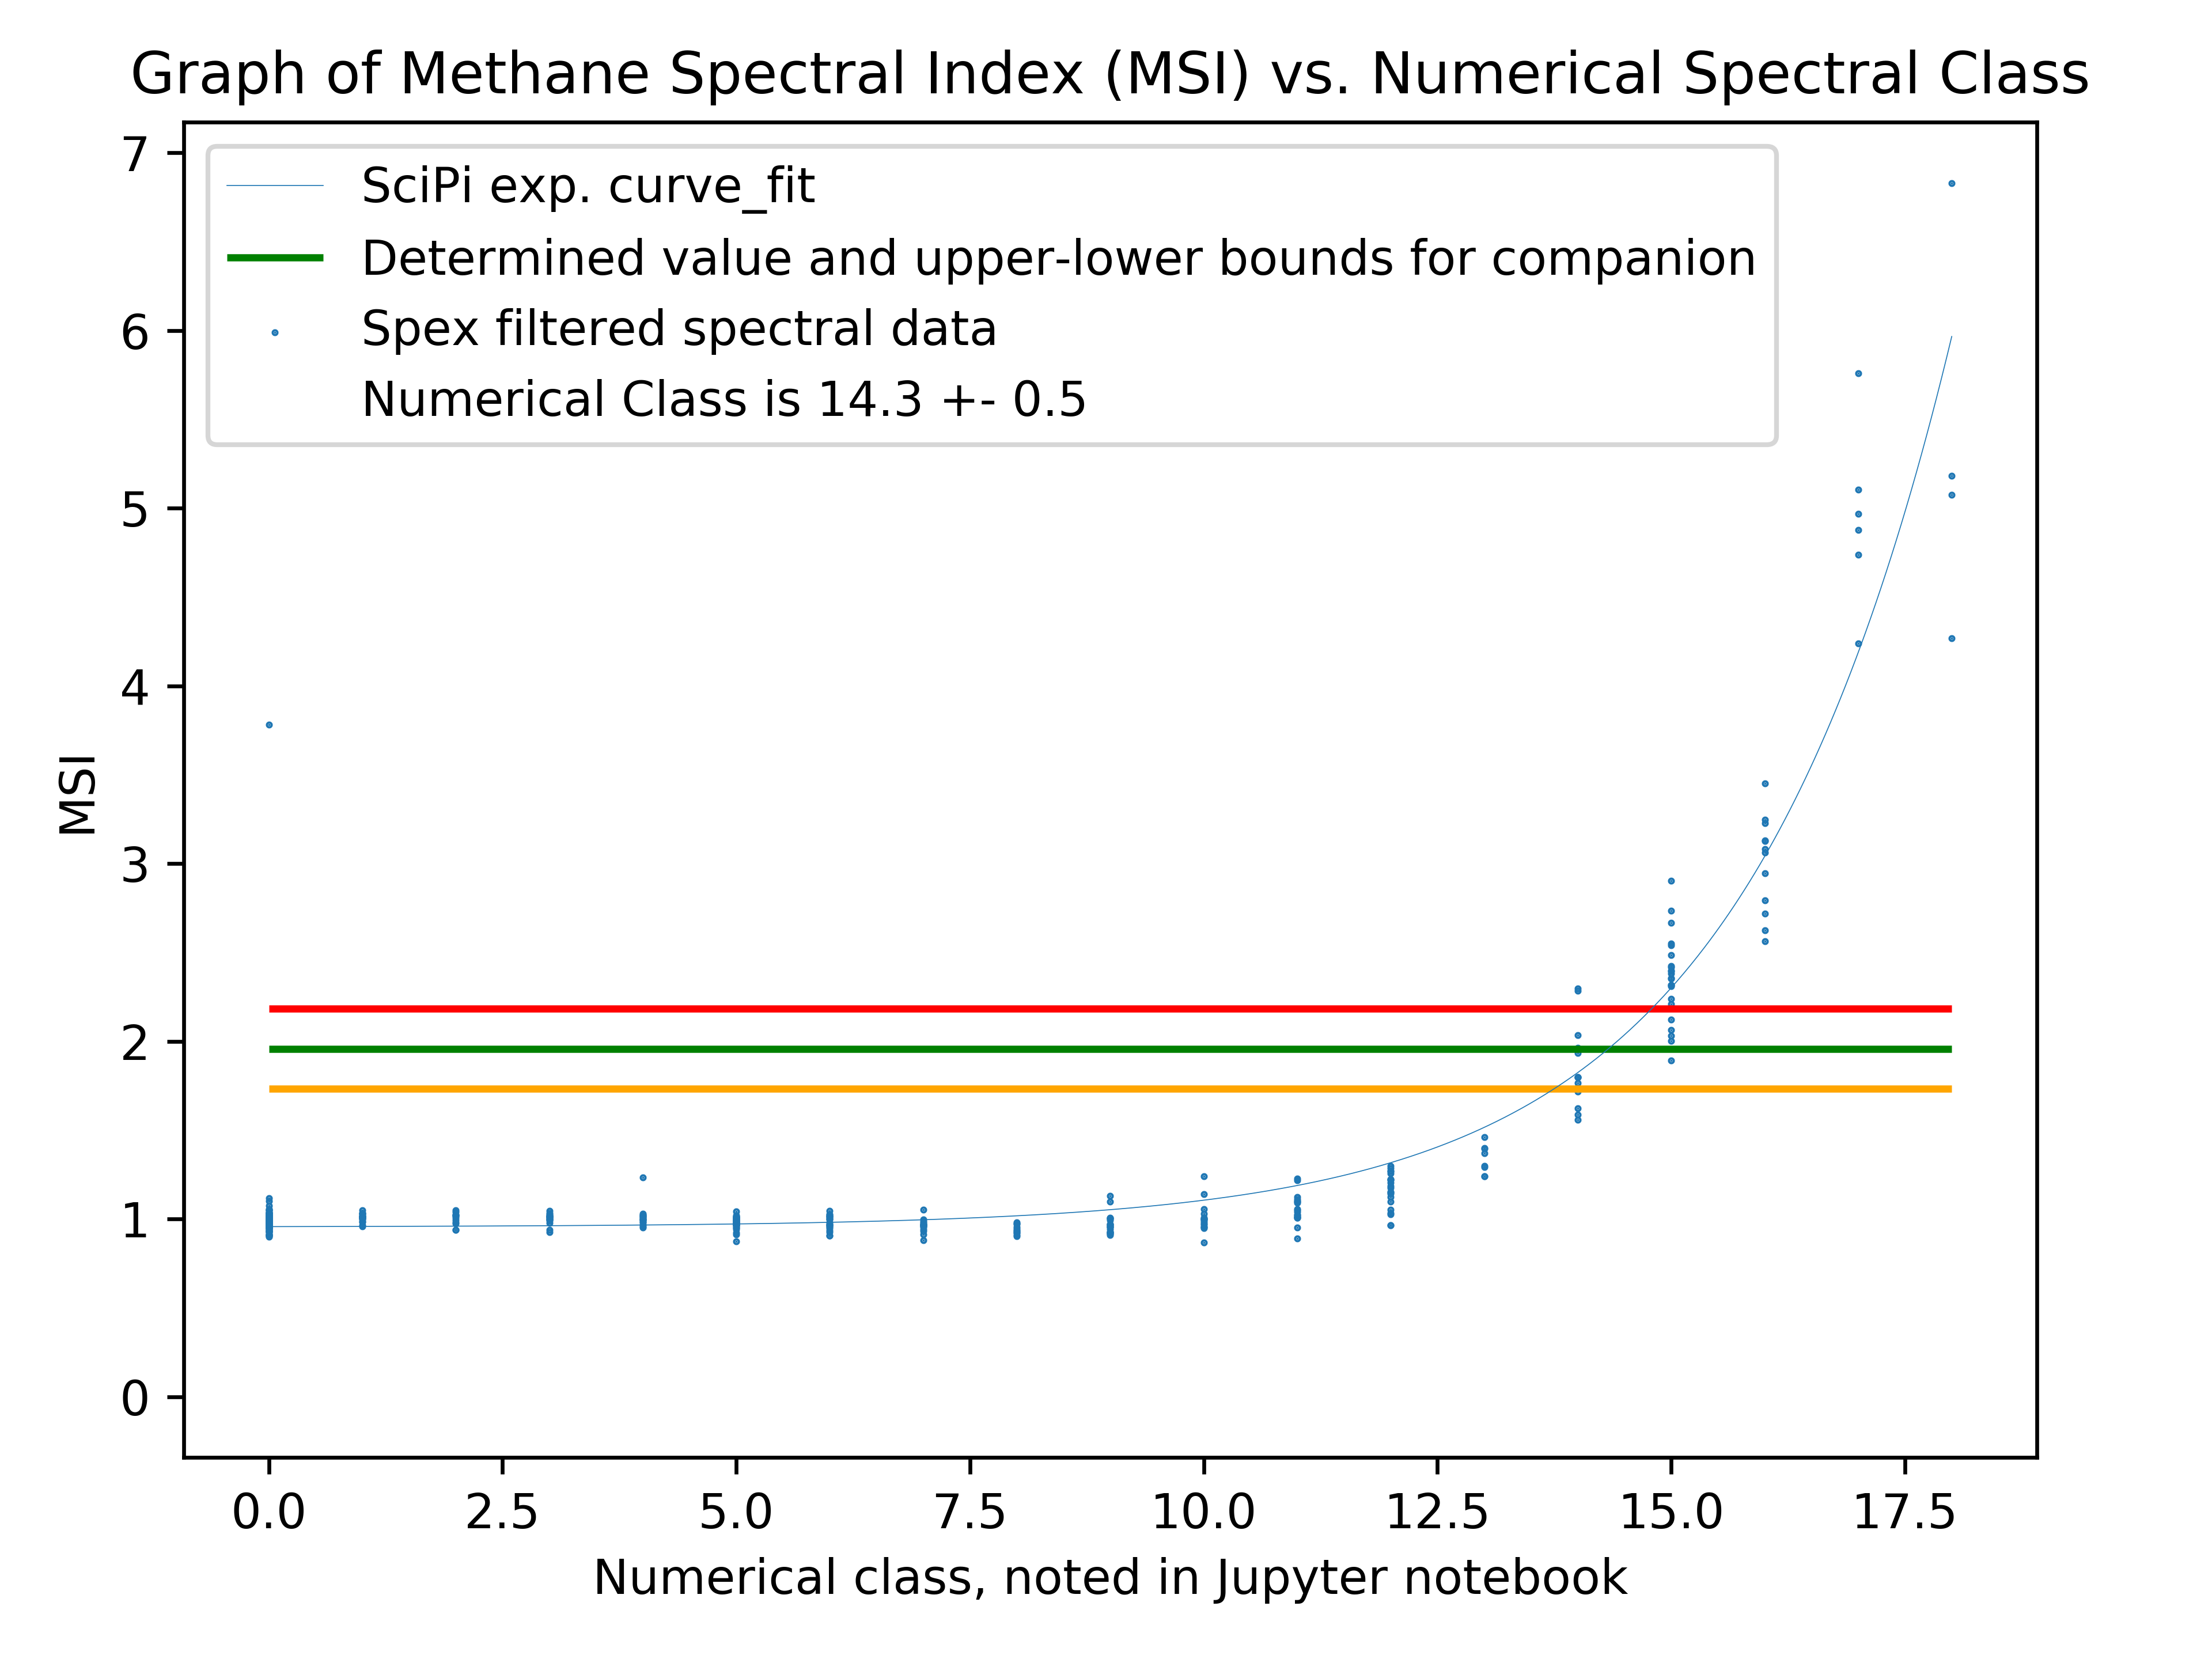